In [1]:
import numpy as np
import math
import os
path = os.getcwd()

# Linear Algebra Review

## 1.1 Basics

**Python vs. Optimization**:

- Optimization: Vectors are always column vectors
  - A vector $a\in R^N$ is a n-tuple $\begin{bmatrix}a_1, a_2, \cdots, a_n\end{bmatrix}$ where $a_i \in R$
  - Note: In python vectors with 2nd row as 1


- `Inner Product:`
  $$a,b\in R^N, \langle a,b\rangle = \sum^N_{i=1} = a^Tb=b^Ta = \langle b,a \rangle$$ 


- `Euclidean norm:` Induced by inner-product
  $$a \in R^N, \|a\|_2 = \sqrt{\langle a,a \rangle}$$


- `Cauchy-schwarz:`
  $$|\langle a,b \rangle| \leq \|a\|_2 \|b\|_2$$


- `Triangle inequality:`
  $$|\langle a,b \rangle|_2 \leq \|a\|_2 \|b\|_2$$



### 1.1.1 Python example: inner product
- Python methods to calculate inner product:
    1. np.dot(a,b)
    2. a@b

In [2]:
# Generate two sets of vectors
a = np.random.randint(6, size=2)
b = np.random.randint(6, size=2)
print('Show a@b ==np.dot(a,b): {}\n'.format(a@b == np.dot(a,b)))

Show a@b ==np.dot(a,b): True



### 1.1.2 Python example: triangle equality

In [3]:
import sys
sys.path.append(path+'/Modules')
from L1_vectors import *

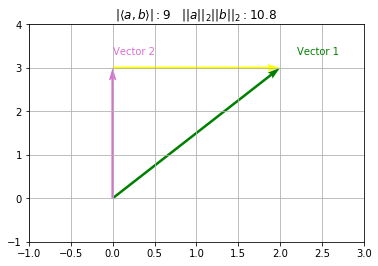

In [4]:
# Generate two sets of vectors
a = np.random.randint(6, size=2)
b = np.random.randint(6, size=2)

vectors([a,b]).graph()

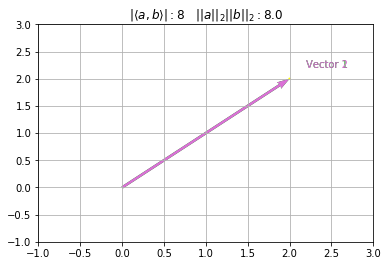

In [5]:
a = np.array([2,2])
b = np.array([2,2])
vectors([a,b]).graph()

## 1.2 Norms

### 1.2.1 Definition
1. Homogeneity:
$$||\alpha x||= ||\alpha| \ ||x||, \text{for} \ \  x\in R^N \text{and} \ \ \alpha \in R$$
2. Subadditivity:
$$||x+y||\leq ||x|| + ||y||, \text{for} \ x,y\in R^N$$

3. Separability:
  - If and only if $||x||=0 \Rightarrow x=0$


Norms:
- $||x||_2$
- $||x||_1$
- $\sqrt{x^T Ax} \rightarrow$ Postive definite 

Not Norms:
- $||x||_0 \rightarrow$ not homogenous 
- $||\nabla x||_2 \rightarrow$ not seperable

### 1.2.2 $\ell_p$ norms

- Controls effect of outliers
- If p is really small it doesn't blow up outliers
- Zero norm just counts the number of non-zeros

$$p\geq 1, a\in R^N, ||a||_p = \Big(\sum^N_{i=1} {a_i|^p} \Big)^{1/p} \tag{1.2.2}$$

- $\ell_2: p=2, \ \ ||a||_2 = \sqrt{\sum_i |a_i|^2}$


- $\ell_1: p=1, \ \ ||a||_1 = \sum_i |a_i|$


- $\ell_\infty: p=\infty, \ \ ||a||_\infty = max_i |a_i|$
  - Looks at the largest entry (outlier) in the data

#### 1.2.2.1 Python example: norms with np.linalg.norm

In [6]:
c = np.array([ 1, 2, 3, 20])
norms = [1,2, np.inf]
for i in norms:
    print('{}-norm: {}'.format(i, round(np.linalg.norm(c, i),3)))

1-norm: 26.0
2-norm: 20.347
inf-norm: 20.0


#### 1.2.2.2 Python example: norms using equation from 1.2.2 
*User created function*

In [7]:
def lp_norm(vector, norm):    
    exponent = [x**norm for x in vector]
    sums = sum(exponent)
    root = (sums)**(1/norm)
    return root

norms = [1,2]
for i in norms:
    print('{}-norm: {}....same as 1.2.1? {}'.format(i, round(lp_norm(c, i),3), lp_norm(c, i)==np.linalg.norm(c, i)))

1-norm: 26.0....same as 1.2.1? True
2-norm: 20.347....same as 1.2.1? True


In [8]:
#Same function as above using lambda
lambda_func = lambda vector, norm: (sum(vector**norm))**(1/norm)
lambda_func(c,2)==lp_norm(c, 2)

True

#### 1.2.2.3 Python example: Norm calculation

**The default norm in python is the frobenius**

- Python methods to calculate norm:
    1. math.sqrt(VECTOR)
    2. np.linalg.norm(VECTOR)

In [9]:
# Generate two sets of vectors
a = np.random.randint(10, size=5)
b = np.random.randint(10, size=5)
# Note that the calculations of methods 1. and 2. are equal
solu_1221 = math.sqrt(a@a)==np.linalg.norm(a)
print('math.sqrt()== np.linalg.norm(): {}\n'.format(solu_1221))
print(tuple([math.sqrt(a@a), np.linalg.norm(b)]))

math.sqrt()== np.linalg.norm(): True

(12.806248474865697, 14.247806848775006)


#### 1.2.2.4 Norm calculation: multiple vectors at once by creating tuple (User created function)

In [10]:
combined = [a,b]
squared = tuple([x**2 for x in combined])
mag = tuple([math.sqrt(sum(x)) for x in squared])
print('Does the solution equal above methods: {}'.format(tuple([math.sqrt(a@a), math.sqrt(b@b)])== mag))
print(mag)

Does the solution equal above methods: True
(12.806248474865697, 14.247806848775006)


#### 1.2.2.5  Matrix norms

#### 1.2.2.5.1 1-norm




In [11]:
matrix = np.array([[-4, -3],[2,1]])
def matrix_1_norm(matrix, norm):
    sum_col = np.sum(abs(matrix), axis=0)
    solu = max(sum_col)
    assert round(solu,4)==round(np.linalg.norm(matrix,1),4), 'Solution not consistent with np.linalg.norm(matrix,1)'
    return solu
matrix_1_norm(matrix, 1)

6

#### 1.2.2.5.2 2-norm

In [12]:
matrix = np.array([[-1, 3],[3,-4],[1,7]])
def matrix_2_norm(matrix):
    dot = matrix.T@matrix
    eig = np.linalg.eig(dot)[0]
    solu = math.sqrt(max(eig))
    assert round(solu,4)==round(np.linalg.norm(matrix,2),4), 'Solution not consistent with np.linalg.norm(matrix,2)'
    return solu
print("Matrix 2-Norm: {}".format(matrix_2_norm(matrix)))

Matrix 2-Norm: 8.660254037844387


#### 1.2.2.5.3  $\infty$ norm

In [13]:
matrix = np.array([[-4, -3],[2,1]])
def matrix_infty_norm(matrix, norm):
    sum_col = np.sum(abs(matrix), axis=1)
    solu = max(sum_col)
    assert round(np.linalg.norm(matrix, np.infty),3)== round(solu,3), 'Solution not consistent with np.linalg.norm(matrix,np.infty)'
    return solu
matrix_infty_norm(matrix, 1)

7

#### 1.2.2.5.4  Frobenius norm

In [14]:
matrix = np.array([[-4, -3],[2,1]])
def matrix_fro_norm(matrix):
    vector = matrix.ravel()
    exponent = [x**2 for x in vector]
    sums = sum(exponent)
    solu = (sums)**(1/2)
    assert round(np.linalg.norm(matrix, 'fro'),3)== round(solu,3), "Solution not consistent with np.linalg.norm(matrix,'fro')"
    return solu
matrix_fro_norm(matrix)

5.477225575051661

#### 1.2.2.1 Triangle inequality for p norm
*Minkowski's inequality*
$$1\leq p\leq \infty, ||a,b||_p \leq ||a||_p + ||b||_p$$

### 1.3 $\ell_p$-norm balls

<img src='Images/Norm_balls.png'>

### 1.3.1 Python example: Norm balls

I did not write the following functions. Credit goes to for [Ben liaw](https://benliaw.ai/Building-Intuition-with-Norm-Balls-in-Hyperdimensions.html)

In [15]:
import sys
sys.path.append('Modules')

In [16]:
#Importing module from norms.py in the Modules folder
from L1_norms import *
def norm_ratios(pt_colors):
    """Calculate ratios of L1, L2, L infinity norm balls.
    Parameters
    ----------
    pt_colors : array, str color of pts
    Returns
    -------
    Float ratio of L1 / L infinity, ratio of L2 / L infinity
    """
    L1_pts = len(pt_colors[pt_colors == 'g'])
    L2_pts = len(pt_colors[pt_colors == 'r'])
    Linf_pts = len(pt_colors[pt_colors == 'b'])
    total_pts = L1_pts + L2_pts + Linf_pts
    return L1_pts / total_pts, (L1_pts + L2_pts) / total_pts

# GLOBAL VARS
SHOW_N = 5
TRIALS = 100000


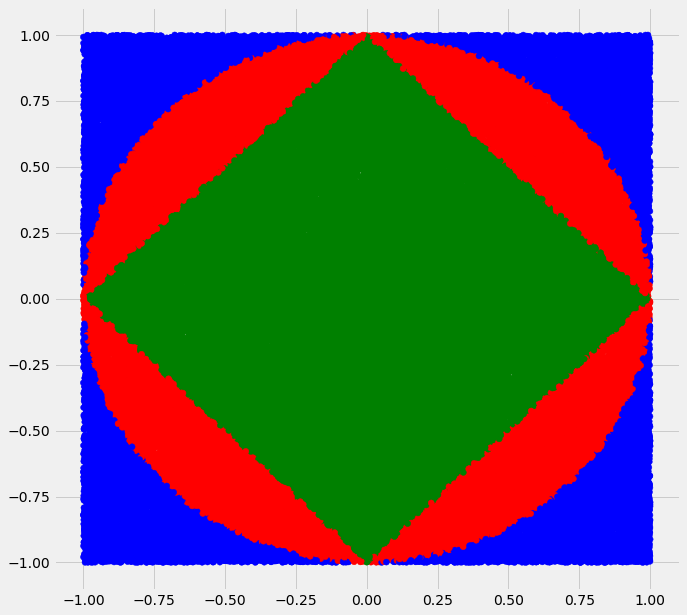

In [17]:
r2 = DartSimulation(TRIALS)
r2.plot_pts_2d()

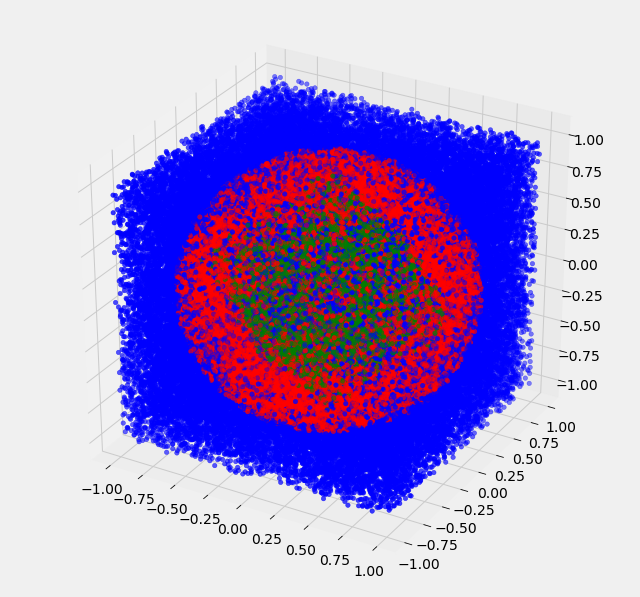

In [18]:
r3 = DartSimulation(TRIALS, 3)
r3.plot_pts_3d()

## 1.4 Equivalence of norms

Two norms are equivalent up to a constant

Given any two norms, say $\ell_p$ and $\ell_q , \exists \ \ \alpha, \beta >0$ such that:

$$\forall a \in R^n , \alpha ||a||_p \leq ||a||_p \leq \beta ||a||_q$$

- $||a||_\infty \leq ||a||_2 \leq \sqrt{N} ||a||_\infty$
- $||a||_\infty \leq ||a||_1 \leq N ||a||_\infty$
- $||a||_2\leq ||a||_1 \leq \sqrt{N} ||a||_2$

**Lemma (General equivalence of $\ell_p$ norms)**
$$1\leq p < q, \ \ \ ||a||_q \leq ||a||_p \leq N^{1/p-1/q} ||a||_q$$

### 1.4.1 Python example: General equivalence of $\ell_p$ norms 
*User created function*

In [19]:
def equiv(vector, p, q):
    assert p<q, 'q must be greater than p'
    right_side= (len(vector)**((1/p)-(1/q)))*np.linalg.norm(c, q)
    gen_equiv_norms = np.linalg.norm(vector, q)< np.linalg.norm(vector, p) < right_side
    print('|a|q < |a|p < N^(1/p-1/q)|a|q ? {}'.format(gen_equiv_norms))

c = np.array([ 1, 2, 3, 20])    
equiv(c,1,2)

|a|q < |a|p < N^(1/p-1/q)|a|q ? True


In [20]:
np.linalg.norm(c, 2)<np.linalg.norm(c, 1)< math.sqrt(len(c))*np.linalg.norm(c, 2)

True

## 1.5 Two important equalities

### 1.5.1 Holder's inequality
- Generalization of the Cauchy-Schwarz inequality for p-norms
- Useful for difficult optimization problems

### 1.5.2 Jensen's inequality
- All convex functions must satisfy
- Convex must curve up


## 2. Subspaces
A set of T-vectors, $V=\{a_1,a_2, \cdots a_T$ \}

- Linear combination
- Linearly independent: No vector can be written as a combination of others
- Span: Set of all linear combination you can form

`Subspace:` A collection of vectors $V \subset R^N \iff$ it is close under linear combinations

`Basis of a subspace:` A linearly independent spanning set
`Dimensionality of subspace:` # of elements in a basis



## 2.2 Matrixs

### 2.2.1 Basics

- $A\in R^{MxN}$


- $A = [a_{ij}] = [a_1, a_2,\cdots a_N]$


- Rank(A) = largest # of linearly independent columns


- Rank(A)= $rank(A^T) \leq min(M,N)$


- A is a full rank if $rank(A) = min(M,N)$

**Matrixs are representations of linear operators!!!**

$$A: R^N \rightarrow R^M \\ x\in R^N \mapsto Ax\in R^M$$


Examples of linear operators that aren't matrices:
- Fourier transform
- Convolutional operations
- Wavelet transform

### 2.2.2 Matrix norms


Spectral norm:

$$||A||_{2,2} = \underset{x\neq0}{\text{max}} = \frac{||Ax||_2}{||x||_2}  = \underset{||x||_2=1}{\text{max}}||Ax||_2$$

- Measures the max increase in length of a unit-norm vectors due to the operation of matrix A

- $||A||_{2,2}$ = largest singular value of A
- $||AB||_{2,2} \leq ||A||_{2,2}||B||_{2,2}$

### 2.2.3 Induced matrix norms

- $||A||_{2,2}$ the max singular value of A
- $||A||_{1,1}$ = max of the absolute column sumbs
- $||A||_{\infty,\infty}$ = max of the absolute row sums

### 2.2.4 Other norms

Frobenius norm: sum squares of entries of matrix
$$||A||_F = \sqrt{\sum_{i,j}|A_i,j|}$$


Nuclear norm: sum of singular values of a matrix
- Squaring all eigenvalues, taking the magnitude of all eigens, trace of the sum is the sum of the eigenvalues

$$||A||_* = trace(\sqrt{A^T A}) = \sum^{min\{M,N\}}_{i=1} \sigma_i$$

#### 2.2.4.1 Python example: Other norms (Frobenius, Nuclear)

In [21]:
d = np.array([[2,4],[5,100]])
norms = ['fro', 'nuc']
for i in norms:
    print('{}-norm: {}'.format(i, round(np.linalg.norm(d, i),4)))

fro-norm: 100.2247
nuc-norm: 102.0049


# 2.3 Eigen, Spectral, SVD

### 2.3.1 Eigenvalues and eigenvectors
Eigenvectors that stretches or compresses a matrix

$$Ax = \lambda x$$

- Where x is an eigenvector and $\lambda$ is an eigenvalue of A

- Eigenvectors are vectors in $R^N$ whose direction is preserved, however length may change

Eigen-decomposition

$$A=UDU^{-1}$$


### 2.3.1.1 Python example: Eigvenvalues and eigenvectors

In [22]:
np.random.seed(1)
A = np.random.randint(20, size=(3,3))
print(A)
print('\n Reproduce matrix A via eigen-decomposition \n')
values, vectors = np.linalg.eig(A)
U = vectors
U_inv = np.linalg.inv(vectors)
D = np.diag(values)
eigen = U@D@U_inv
print(eigen)

[[ 5 11 12]
 [ 8  9 11]
 [ 5 15  0]]

 Reproduce matrix A via eigen-decomposition 

[[5.0000000e+00 1.1000000e+01 1.2000000e+01]
 [8.0000000e+00 9.0000000e+00 1.1000000e+01]
 [5.0000000e+00 1.5000000e+01 3.9670199e-15]]



### 2.3.2 Spectral theorem

If $A=A^H$

If matrix is symmetric: 
- All the eigen values are real
- Eigenvectors with different eigenvalues are perpendicular
- $\exists$ a complete orthogonal basis of vectors

If the matrix is symmetric then eigevenvalue decomposition is useful because you can represent space in terms of the span of the eigenvalues and you can analyze the matrix by looking at the eigenvalue independently
- Should not be used for non-symmetric matrix

### 2.3.3 Singular value decomposition (SVD)

$$A = U \sigma V^T$$

SVD can be used with non-symmetric matrix, because it always exists 
- Similar to eigen expect that the start and end of rotation don't have to be the same
    - You can rotate, shrink, and rotate without having it be the inverse
    
If $A^{-1}$ exists then $A^{-1} = V\sum^{-1} U^T$

### 2.3.4 Solving y = Ax

Block inversion formulas
The Schur complement

## Appendix

Python:
- Vectors with 2nd row as 1

Norm:
Matlab:
- Norm is the 2-norm
Python:
- Frobenius norm

In [23]:
import numpy as np
np.shape(np.array([1,2,3]))

(3,)

In [24]:
np.shape(np.array([1,2,3]).T)

(3,)

In [25]:
np.shape(np.array([1,2,3]).reshape(-1,1))

(3, 1)